## Ensemble Techniques

We regularly come across many game shows on television and you must have noticed an option of “Audience Poll”. Most of the times a contestant goes with the option which has the highest vote from the audience and most of the times they win. We can generalize this in real life as well where taking opinions from a majority of people is much more preferred than the opinion of a single person.
Ensemble technique has a similar underlying idea where we aggregate predictions from a group of predictors, which may be classifiers or regressors, and most of the times the prediction is better than the one obtained using a single predictor. Such algorithms are called Ensemble methods and such predictors are called Ensembles.

Let’s suppose we have ‘n’ predictors:

Z1, Z2, Z3, ......., Zn with a standard deviation of σ

Var(z) = σ^2

If we use single predictors Z1, Z2, Z3, ......., Zn the variance associated with each will be σ2 but the expected value will be the average of all the predictors.

Let’s consider the average of the predictors:

µ = (Z1 + Z2 + Z3+.......+ Zn)/n

if we use µ as the predictor then the expected value still remains the same but see the variance now:

variance(µ) = σ^2/n

So, the expected value remained ‘µ’ but variance decreases when we use average of all the predictors.

This is why taking mean is preferred over using single predictors.

Ensemble methods take multiple small models and combine their predictions to obtain a more powerful predictive power.

There are few very popular Ensemble techniques which we will talk about in detail such as Bagging, Boosting, stacking etc.

<img src="ensemble.PNG"> 

image courtsey: Google

<img src="1.PNG">                           



### Bagging (Bootstrap Aggregation)

In real life scenarios we don’t have multiple different training sets on which we can train our model separately and at the end combine their result. Here, bootstrapping comes into picture. Bootstrapping is a technique of sampling different sets of data from a given training set by using replacement. After bootstrapping the training dataset, we train model on all the different sets and aggregate the result. This technique is known as Bootstrap Aggregation or Bagging.

Let’s see definition of bagging:

Bagging is the type of ensemble technique in which a single training algorithm is used on different subsets of the training data where the subset sampling is done with replacement (bootstrap). 
Once the algorithm is trained on all the subsets, then bagging makes the prediction by aggregating all the predictions made by the algorithm on different subsets. In case of regression, bagging prediction is simply the mean of all the predictions and in the case of classifier, bagging prediction is the most frequent prediction (majority vote) among all the predictions.

Bagging is also known as parallel model since we run all models parallely and combine there results at the end.

<img src="2.PNG">        

<img src="3.PNG">  

image courtsey: Google

* Advantages of a Bagging Model

1)	Bagging significantly decreases the variance without increasing bias. 

2)	Bagging methods work so well because of diversity in the training data since the sampling is done by bootstraping.

3)	Also, if the training set is very huge, it can save computional time by training model on relatively smaller data set and still can increase the accuracy of the model.

4) Works well with small datasets as well.

* **Disadvantage of a Bagging Model

The main disadvantage of Bagging is that it improves the accuracy of the model on the expense of interpretability i.e. if a single tree was being used as the base model, then it would have a more attarctive and easily interpretable diagram, but with use of bagging this interpretability gets lost.

## Pasting

Pasting is an ensemble technique similar to bagging with the only difference being that there is no replacement done while sampling the training dataset. This causes less diversity in the sampled datasets and data ends up being correlated. That's why bagging is more preffered than pasting in real scenarios.

## Out-of-Bag Evaluation

In bagging, when different samples are collected, no sample contains all the data but a fraction of the original dataset.
There might be some data which are never sampled at all. The remaining data which are not sampled are called out of bag instances. Since the model never trains over these data, they can be used for evaluating the accuracy of the model by using these data for predicition. We do not need validation set or cross validation and can use out of bag instances for that purpose.




Let's see python implementation of Bagging:

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [4]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.916083916083916

let's using bagging over our KNN classifier and see if our score improves:

In [5]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3,oob_score=True) 

In [6]:
#Let's check the out of bag score 
bag_knn.oob_score

True

In [7]:
bag_knn.fit(X_train, y_train)

bag_knn.score(X_test, y_test)

0.9370629370629371

Great! our score sginificantly improves with use of bagging.

let's not use bootstrap and see the model accuracy! Remember this is "Pasting"

In [8]:

pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=False, random_state=3) 

In [9]:
pasting_knn.fit(X_train, y_train)

pasting_knn.score(X_test, y_test)

0.9300699300699301

## Random Forests

Decision trees are one of such models which have low bias but high variance. We have studied that decision trees tend to overfit the data. So bagging technique becomes a very good solution for decreasing the variance in a decision tree.
Instead of using a bagging model with underlying model as a decision tree, we can also use Random forest which is more convenient and well optimized for decision trees. The main issue with bagging is that there is not much independence among the sampled datasets i.e. there is correlation. The advantage of random forests over bagging models is that the random forests makes a tweak in the working algorithm of bagging model to decrease the correlation in trees.  The idea is to introduce more randomness while creating trees which will help in reducing correlation.

Let’s understand how algorithm works for a random forest model:

1)	Just like in bagging, different samples are collected from the training dataset using bootstraping.

2)	On each sample we train our tree model and we allow the trees to grow with high depths. 

    Now, the difference with in random forest is how the trees are formed. In bootstraping we allow all the sample data to be used for splitting the nodes but not   with random forests.  When building a decision tree, each time a split is to happen, a random sample of ‘m’ predictors are chosen from the total ‘p’ predictors. Only those ‘m’ predictors are allowed to be used for the split.

    Why is that?

    Suppose in those ‘p’ predictors, 1 predictor is very strong. Now each sample this predictor will remain the strongest. So, whenever trees will be built for these sampled data, this predictor will be chosen by all the trees for splitting and thus will result in similar kind of tree formation for each bootstrap model. This introduces correaltion in the dataset and averaging correalted dataset results do not lead low variance. That’s why in random forest the choice for selecting node for split is limited and it introduces randomness in the formation of the trees as well.
    Most of the predictors are not allowed to be considered for split.
    Generally, value of ‘m’ is taken as m ≈√p , where ‘p’ is the number of predictors in the sample.

    When m=p , the random forest model becomes bagging model.   
              
    *This method is also referred as “Feature Sampling”


3)	Once the trees are formed, prediction is made by the random forest by aggregating the predictions of all the model.  For regression model, the mean of all the predictions is the final prediction and for classification mode, the mode of all the predictions is considered the final predictions. 



## Problem Statement 

`To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.`

In [1]:
#Important libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing,Normalizing 
from sklearn.preprocessing import StandardScaler

#For multicollinearity
from statsmodels.stats.outliers_influence import  variance_inflation_factor

#Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import  RandomForestClassifier

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [3]:
# Dataset stats
print ('Shape of Data set= >', df.shape[0],'Rows', df.shape[1], 'Columns')

Shape of Data set= > 69301 Rows 13 Columns


In [4]:
# All are int and float types.  Understand the stats of dataframe
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Observations
#1 - No Missing values
#2 - Assuming Age is in number of days
#3 - Outliers in height
#4 - Outliers in Systolic blood pressure - ap_high
#5 - Outliers in ap_low
#6 - Seems Cholestrol and glucose are binary. will see in the further analysis

In [6]:
# Drop Id and remove duplicates
df.drop('id',axis=1,inplace=True)

#Duplicate removal
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(69277, 12)

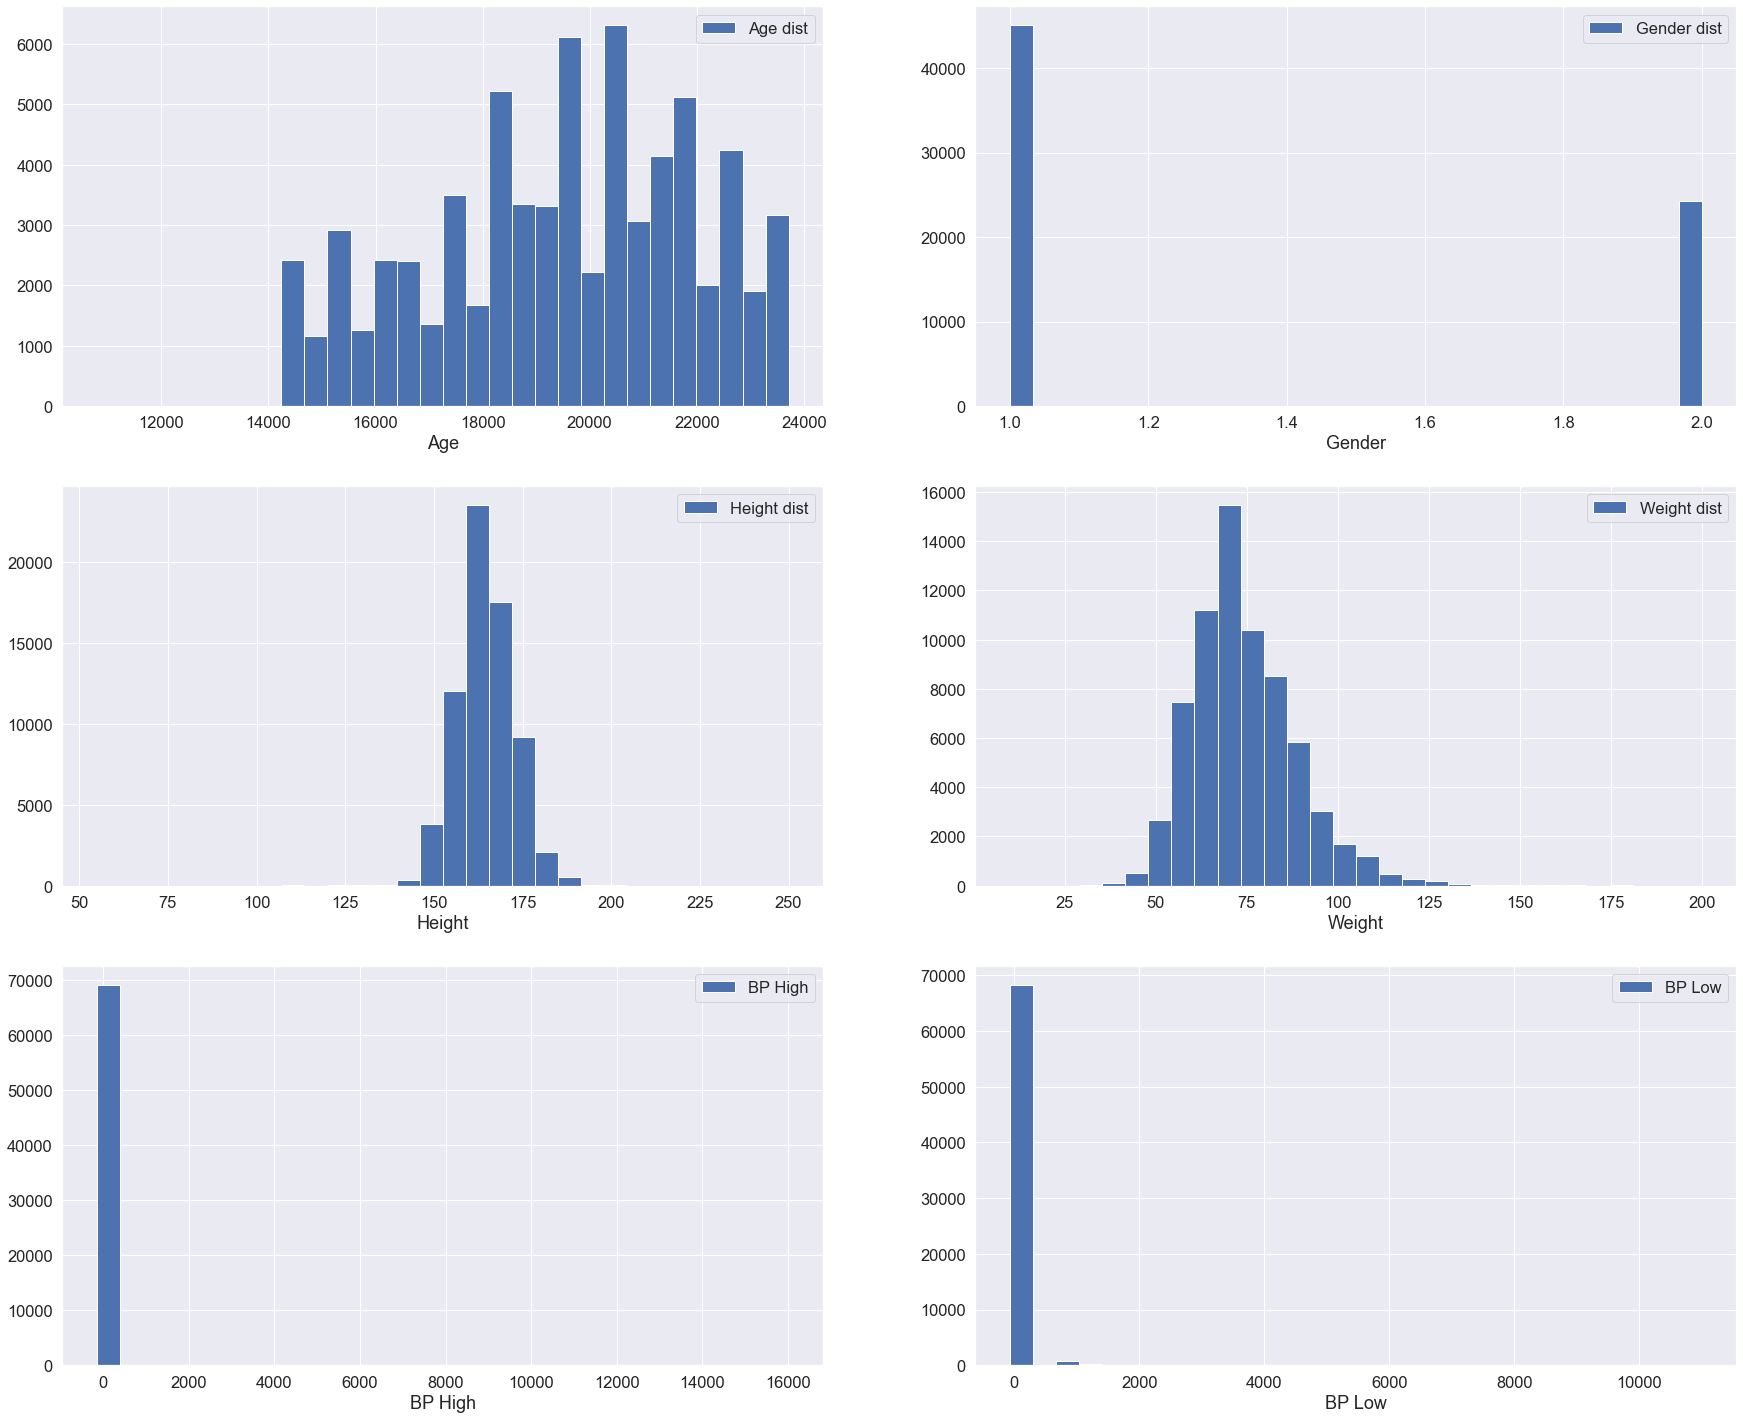

In [8]:
fig = plt.figure(figsize=(30,25))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(321)
plt.hist(df['age'],label='Age dist',bins=30)
plt.legend()
plt.xlabel('Age')

fig2 = fig.add_subplot(322)
plt.hist(df['gender'],label='Gender dist',bins=30)
plt.legend()
plt.xlabel('Gender')

fig3 = fig.add_subplot(323)
plt.hist(df['height'],label='Height dist',bins=30)
plt.legend()
plt.xlabel('Height')

fig4 = fig.add_subplot(324)
plt.hist(df['weight'],label='Weight dist',bins=30)
plt.legend()
plt.xlabel('Weight')

fig5 = fig.add_subplot(325)
plt.hist(df['ap_hi'],label='BP High',bins=30)
plt.legend()
plt.xlabel('BP High')

fig6 = fig.add_subplot(326)
plt.hist(df['ap_lo'],label='BP Low',bins=30)
plt.legend()
plt.xlabel('BP Low')


plt.show()

In [9]:
# with std 3 lets see the stats
from scipy import stats
from scipy.stats import norm, zscore

z_score = stats.zscore(df[['age','height','ap_hi','weight','ap_lo']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis=1)
df_validation = df[filtering_entry]
df_validation.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df_validation.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


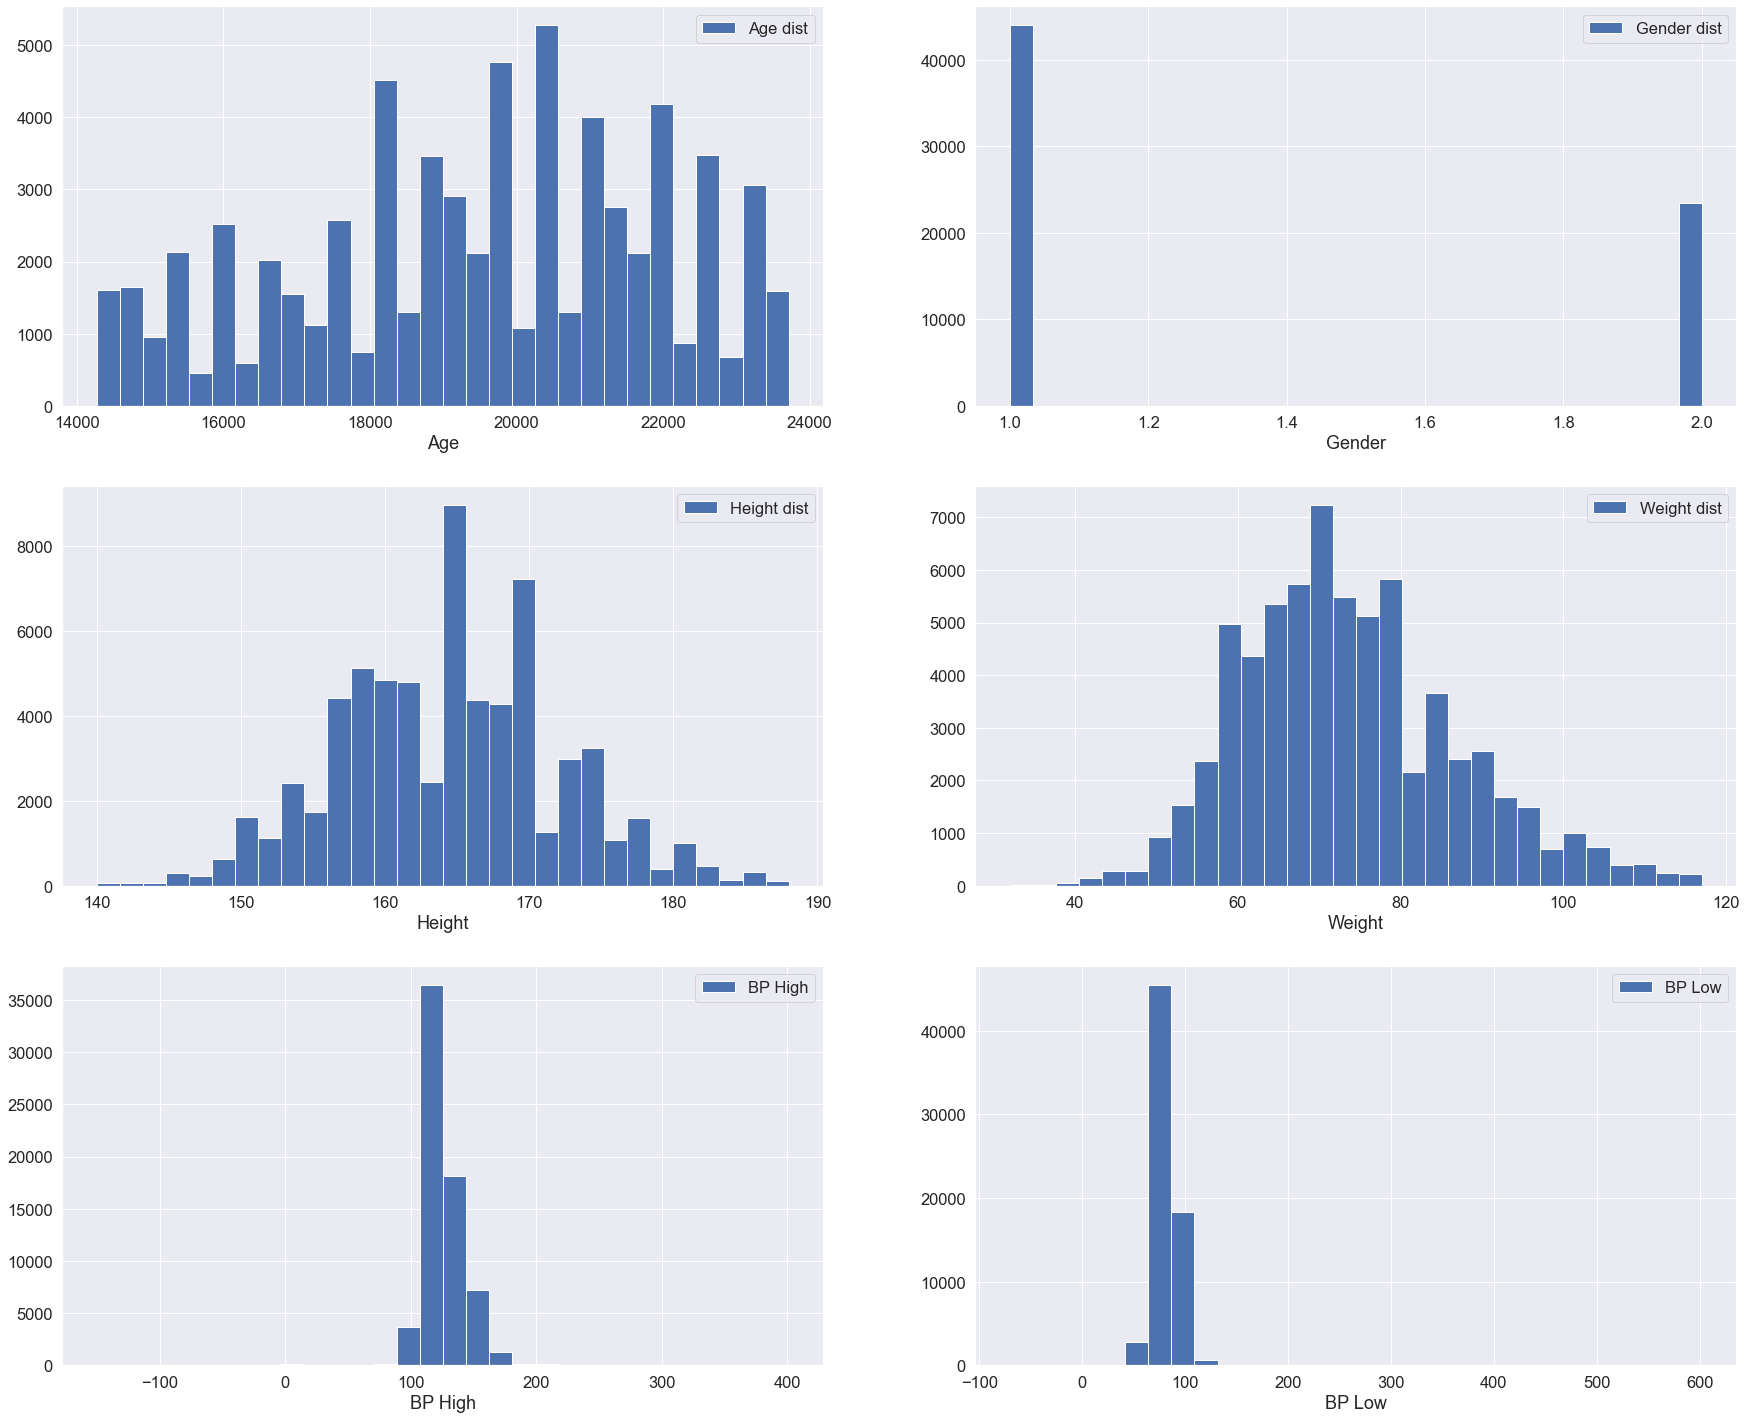

In [11]:
#Replot the same and see the distribution again
fig = plt.figure(figsize=(30,25))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(321)
plt.hist(df_validation['age'],label='Age dist',bins=30)
plt.legend()
plt.xlabel('Age')

fig2 = fig.add_subplot(322)
plt.hist(df_validation['gender'],label='Gender dist',bins=30)
plt.legend()
plt.xlabel('Gender')

fig3 = fig.add_subplot(323)
plt.hist(df_validation['height'],label='Height dist',bins=30)
plt.legend()
plt.xlabel('Height')

fig4 = fig.add_subplot(324)
plt.hist(df_validation['weight'],label='Weight dist',bins=30)
plt.legend()
plt.xlabel('Weight')

fig5 = fig.add_subplot(325)
plt.hist(df_validation['ap_hi'],label='BP High',bins=30)
plt.legend()
plt.xlabel('BP High')

fig6 = fig.add_subplot(326)
plt.hist(df_validation['ap_lo'],label='BP Low',bins=30)
plt.legend()
plt.xlabel('BP Low')


plt.show()

In [12]:
# Cannot make out much from the above plots. Lets build model
X = df_validation.drop(columns=['cardio'], axis=1)
y = df_validation['cardio']

In [13]:
#multicollinearity - vif

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score'] = [variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['feature'] = X.columns
vif

,score,feature
0,1.071123,age
1,1.507506,gender
2,1.519844,height
3,1.221738,weight
4,1.658717,ap_hi
5,1.607891,ap_lo
6,1.317412,cholesterol
7,1.257853,gluc
8,1.248261,smoke
9,1.139820,alco


In [14]:
# RandomForestClassifier
X_train,x_test,Y_train,y_test = train_test_split(X_scaler,y,test_size=.25,random_state=41)
clf = RandomForestClassifier()
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(clf,param_grid=params)
grd.fit(X_train,Y_train)
print ('best_params = >', grd.best_params_)

clf = grd.best_estimator_    # reinstantiating with best params

clf.fit(X_train,Y_train)
y_pred = clf.predict(x_test)


rf_conf_mat = confusion_matrix(y_test,y_pred)

print ('conf_mat = >','\n', rf_conf_mat)

print ('Accuracy rf Normal ======> ', accuracy_score(y_test,y_pred))

best_params = > {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 13}
conf_mat = > 
 [[6784 1759]
 [2703 5594]]
Accuracy rf Normal ======>  0.7350356294536817


In [15]:
report = classification_report(y_test,y_pred)
print (report)

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      8543
           1       0.76      0.67      0.71      8297

    accuracy                           0.74     16840
   macro avg       0.74      0.73      0.73     16840
weighted avg       0.74      0.74      0.73     16840



### Note


**`You can improve the performance by tweaking preprocessing methods`**

# Let's plot ROC AUC curve to choose best model

In [16]:
# Plot ROC/AUC for multiple models without hyperparams tuning.

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [17]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
              
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf = 5, min_samples_split= 11, n_estimators= 15,random_state=1234)]

In [18]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, Y_train)
    yproba = model.predict_proba(x_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [19]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.00011705489874751258, 0.00011705489874...","[0.0, 0.0, 0.0001205254911413764, 0.0001205254...",0.786207
KNeighborsClassifier,"[0.0, 0.048811892777712744, 0.1377736158258223...","[0.0, 0.21875376642159816, 0.4799325057249608,...",0.744985
DecisionTreeClassifier,"[0.0, 0.35959264895235865, 0.3599438136486012,...","[0.0, 0.6338435579124985, 0.6339640834036399, ...",0.637100
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.00011705489874751258, 0.0001...","[0.0, 0.0001205254911413764, 0.001446305893696...",0.798164


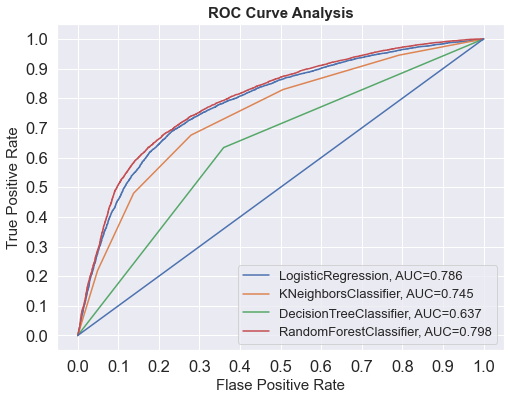

In [20]:
#Plot
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='b', linestyle='-')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()